# Exercises - Customer Segmentation Clustering

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Import Data

In [3]:
df = pd.read_csv("./Mall_Customers.csv") 
# you can download the dataset at https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data?select=Mall_Customers.csv
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

## Data Analysis

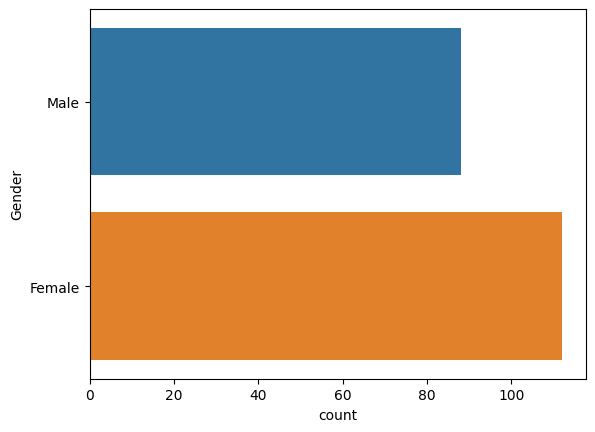

In [6]:
sns.countplot(y = 'Gender', data = df)
plt.show()

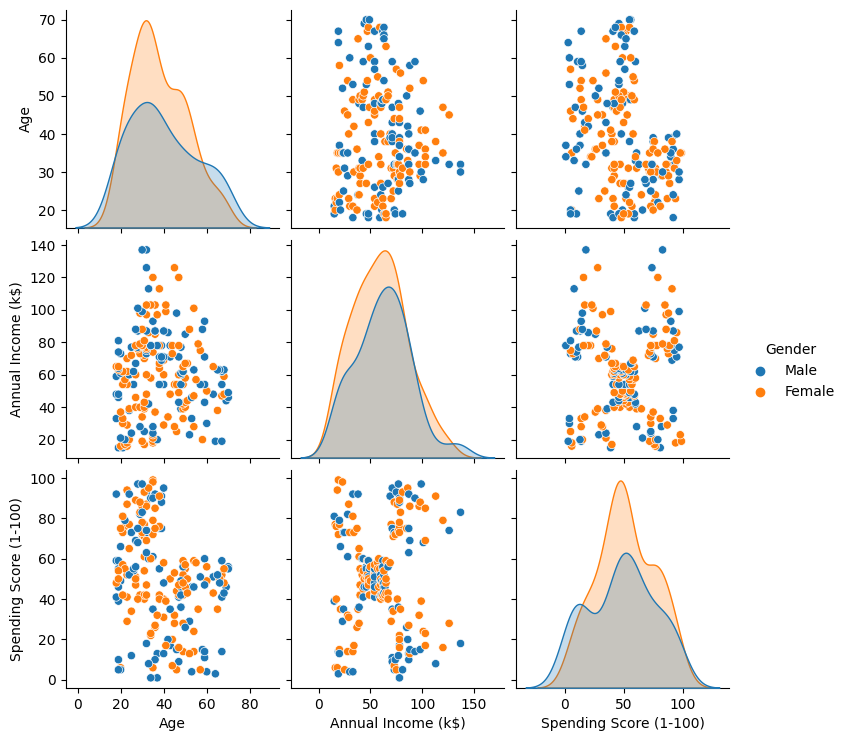

In [7]:
df.drop(['CustomerID'], axis = 1, inplace = True)
sns.pairplot(df, hue = 'Gender')

## Data Pre-processing

In [8]:
X1 = df.loc[:,['Age', 'Spending Score (1-100)']].values
X2 = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values
X3 = df.loc[:,['Age', 'Annual Income (k$)']].values

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)

## Model Training

In [9]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km1 = KMeans(n_clusters=k, n_init = 10)
    km1.fit(X1)
    sse.append(km1.inertia_)

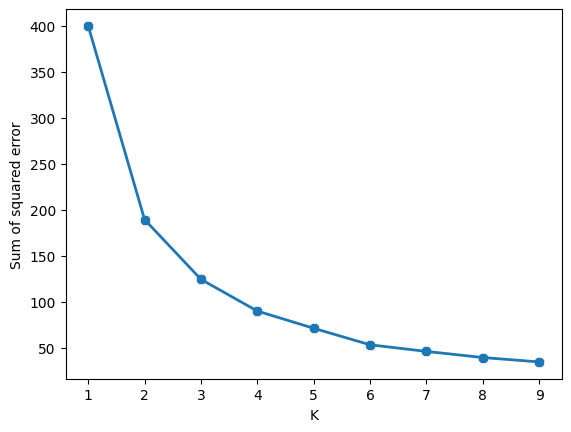

In [10]:
# Elbow Method
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse, linewidth=2, marker='8')

In [11]:
km1 = KMeans(n_clusters=4, n_init = 10)
y_predicted1 = km1.fit_predict(X1)
y_predicted1

array([3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 2, 0, 2, 0,
       1, 0, 2, 3, 3, 3, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       0, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0], dtype=int32)

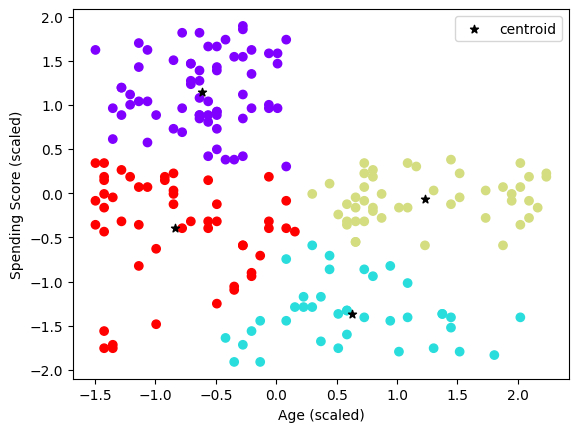

In [12]:
plt.scatter(X1[:,0],X1[:,1],c=km1.labels_, cmap='rainbow')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
plt.show()

In [13]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 20,
    'max_iter': 300,
    'random_state': 42
}

In [14]:
def kmeans_model(k, x):
    model = KMeans(k, **kmeans_kwargs)
    model.fit(x)
    labels = model.labels_
    centroids = model.cluster_centers_
    return model, labels, centroids

In [15]:
def plot_clusters(x, h, model, labels, centroids):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) 
    sns.set_style('ticks')
    plt.clf()
    plt.figure(figsize=(12, 6))

    plt.imshow(z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Pastel1', aspect = 'auto',
           origin = 'lower')

    sns.scatterplot(x = x[:, 0], y = x[:, 1], 
                hue = labels, palette = 'tab10', s = 100)
    plt.scatter(x = centroids[:, 0] , y = centroids[:, 1], 
                s = 100, c = 'black', alpha = 0.8, marker = 'X')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

<Figure size 640x480 with 0 Axes>

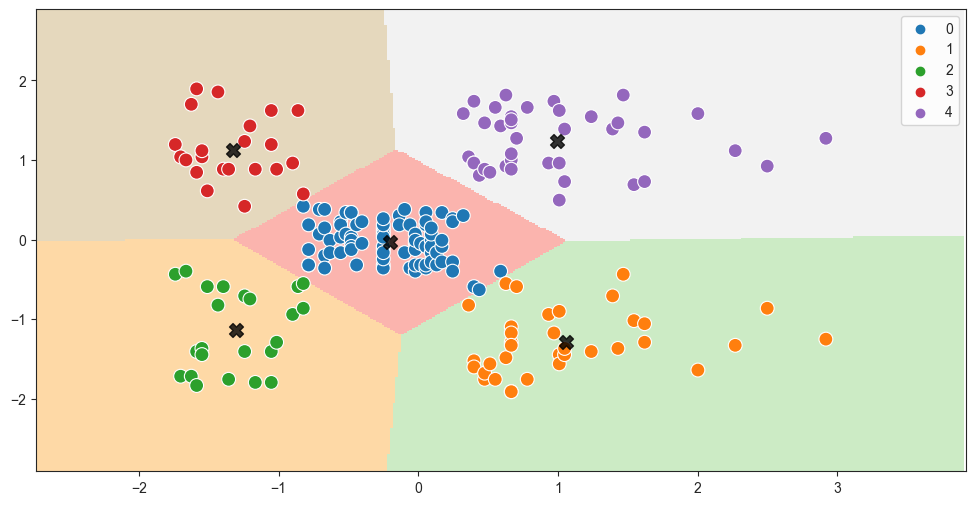

In [16]:
X2_model, X2_labels, X2_centroids = kmeans_model(5, X2)
plot_clusters(X2, 0.02, X2_model, X2_labels, X2_centroids)

<Figure size 640x480 with 0 Axes>

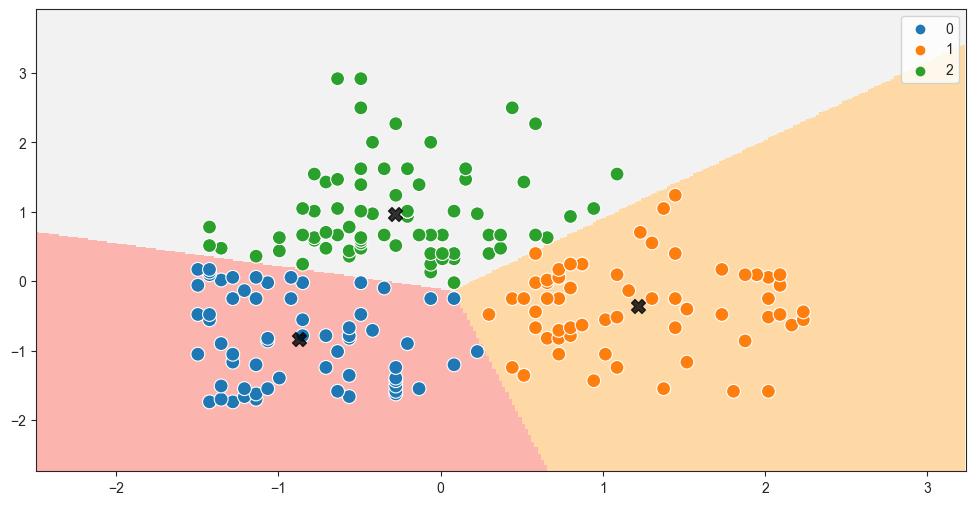

In [17]:
X3_model, X3_labels, X3_centroids = kmeans_model(3, X3)
plot_clusters(X3, 0.02, X3_model, X3_labels, X3_centroids)